In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load dataset
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to range 0-1
x_train, x_test = x_train / 255.0, x_test / 255.0

In [6]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [7]:
y_train[0]

5

In [3]:
# Define a CNN Model
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),  # Conv Layer 1
    keras.layers.MaxPooling2D((2, 2)),  # Pooling Layer 1

    keras.layers.Conv2D(64, (3, 3), activation='relu'),  # Conv Layer 2
    keras.layers.MaxPooling2D((2, 2)),  # Pooling Layer 2

    keras.layers.Flatten(),  # Flatten Feature Maps
    keras.layers.Dense(128, activation='relu'),  # Fully Connected Layer
    keras.layers.Dense(10, activation='softmax')  # Output Layer (10 classes)
])

In [4]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.9065 - loss: 0.3049 - val_accuracy: 0.9803 - val_loss: 0.0613
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9862 - loss: 0.0467 - val_accuracy: 0.9906 - val_loss: 0.0289
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9913 - loss: 0.0294 - val_accuracy: 0.9876 - val_loss: 0.0351
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9934 - loss: 0.0215 - val_accuracy: 0.9912 - val_loss: 0.0282
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9953 - loss: 0.0149 - val_accuracy: 0.9898 - val_loss: 0.0320


In [8]:
# Save the model
model.save('D:\Guvi_Project\Personalized Learning Assistant\models\llm_models\cnn_model.h5')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


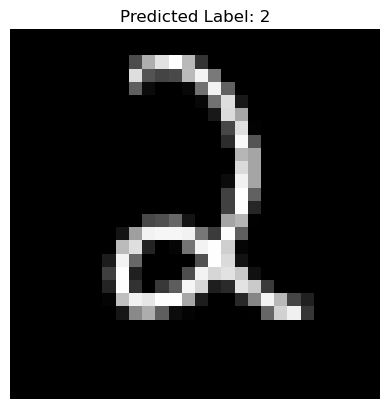

In [9]:
predictions = model.predict(x_test)

# Show the first test image and its predicted label
plt.imshow(x_test[47].reshape(28, 28), cmap='gray')
plt.title(f"Predicted Label: {np.argmax(predictions[47])}")
plt.axis('off')
plt.show()